# 1 - Thresholding

## 1.1 

In [ ]:
#TODO : CHANGE FILTER2D --> blur

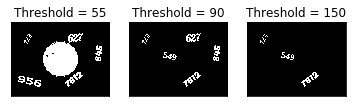

In [20]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# import image
image_path = "./numbers.jpg"
img = cv2.imread(image_path)

# convert to grayscale, ie RGB -> [0,1] 
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
height, width = img_gray.shape

THRESHOLDS = [55, 90, 150]

# Create placeholder matrix for the outputs
imgs_thres = [0, 0, 0]
for i in range(3):
    imgs_thres[i] = np.zeros((height, width), dtype=np.uint8)
    
# same operation w/o loops
ret1, img_thres1 = cv2.threshold(img_gray, THRESHOLDS[0], 255, cv2.THRESH_BINARY)
ret2, img_thres2 = cv2.threshold(img_gray, THRESHOLDS[1], 255, cv2.THRESH_BINARY)
ret3, img_thres3 = cv2.threshold(img_gray, THRESHOLDS[2], 255, cv2.THRESH_BINARY)

# display
#plt.subplot(141), plt.imshow(img_gray, cmap='gray')
#plt.title("Grayscale Image"), plt.xticks([]), plt.yticks([])
plt.subplot(131), plt.imshow(img_thres1, cmap='gray')
plt.title("Threshold = 55"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(img_thres2, cmap='gray')
plt.title("Threshold = 90"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(img_thres3, cmap='gray')
plt.title("Threshold = 150"), plt.xticks([]), plt.yticks([])
plt.show()

## 1.2 

## 1.3

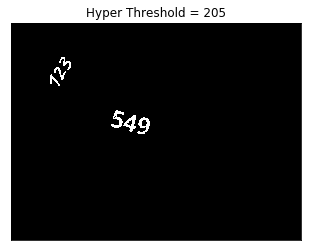

In [51]:
# This hyper-parameter was found by trial and error

HYPER_THRESHOLD = 205
ret_h, img_h_thres = cv2.threshold(img_gray, HYPER_THRESHOLD, 255, cv2.THRESH_BINARY)
plt.imshow(img_h_thres, cmap='gray')
plt.title("Hyper Threshold = 205"), plt.xticks([]), plt.yticks([])
plt.show()

# 2 - Filtering

## 2.1 - Denoising

### 2.1.1

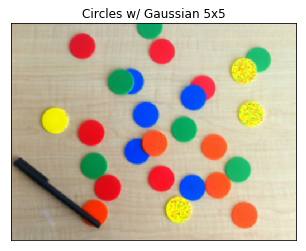

In [23]:
img_clean_path = "./Circles.png"
img_gauss_path = "./Circles_gauss.png"

# Read images
img_clean = cv2.imread(img_clean_path)
img_noisy = cv2.imread(img_gauss_path)

# Filter image using 5x5, sigmaX = 0 
res1 = cv2.GaussianBlur(img_noisy, (5,5), 0) 

# Convert to RGB for matplotlib
res1 = cv2.cvtColor(res1, cv2.COLOR_BGR2RGB)

plt.imshow(res1)
plt.title("Circles w/ Gaussian 5x5"), plt.xticks([]), plt.yticks([])
plt.show()

### 2.1.2

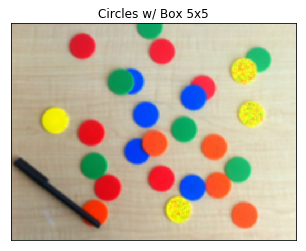

In [27]:
# Filter using Box
res2 = cv2.blur(img_noisy, (5,5))

# Convert from BGR to RGB
res2 = cv2.cvtColor(res2, cv2.COLOR_BGR2RGB)

plt.imshow(res2)
plt.title("Circles w/ Box 5x5"), plt.xticks([]), plt.yticks([])
plt.show()

### 2.1.3

In [58]:
# Calculating Peak Signal to Noise Ratio (PSNR)
PSNR_Gaussian = cv2.PSNR(img_clean, res1)
PSNR_Box = cv2.PSNR(img_clean, res2)

print("PSNR Gaussian \t", PSNR_Gaussian)
print("PSNR Box Filter \t", PSNR_Box)

PSNR Gaussian 	 10.607401904434084
PSNR Box Filter 	 10.638247348424743


### 2.1.4

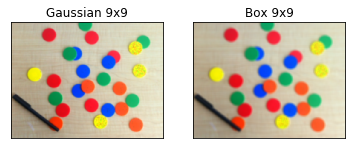

PSNR Gaussian 	 10.62553857243925
PSNR Box Filter 	 10.73621351107211


In [28]:
# Setting the size of Gaussian Filter to 9x9 and Box Filter to 13x13

# Filter Using Gaussian and set to RGB for 9
res3 = cv2.GaussianBlur(img_noisy, (9,9), 0)
res3 = cv2.cvtColor(res3, cv2.COLOR_BGR2RGB)

# Filter Using Box Filter and set to RGB for 9 
res4 = cv2.blur(img_noisy, (9,9))
res4 = cv2.cvtColor(res4, cv2.COLOR_BGR2RGB)

plt.subplot(121), plt.imshow(res3)
plt.title("Gaussian 9x9"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(res4)
plt.title("Box 9x9"), plt.xticks([]), plt.yticks([])
plt.show()

# Calculating Peak Signal to Noise Ratio (PSNR)
PSNR_Gaussian = cv2.PSNR(img_clean, res3)
PSNR_Box = cv2.PSNR(img_clean, res4)

print("PSNR Gaussian \t", PSNR_Gaussian)
print("PSNR Box Filter \t", PSNR_Box)

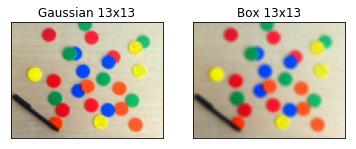

PSNR Gaussian 	 10.672103948822016
PSNR Box Filter 	 10.84130173767948


In [65]:
# Filter Using Gaussian and set to RGB for 9
res3 = cv2.GaussianBlur(img_noisy, (13,13), 0)
res3 = cv2.cvtColor(res3, cv2.COLOR_BGR2RGB)

# Filter Using Box Filter and set to RGB for 9 
kernel = np.ones((13,13), np.float32)/(13*13)
res4 = cv2.filter2D(img_noisy, -1, kernel)
res4 = cv2.cvtColor(res4, cv2.COLOR_BGR2RGB)

plt.subplot(121), plt.imshow(res3)
plt.title("Gaussian 13x13"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(res4)
plt.title("Box 13x13"), plt.xticks([]), plt.yticks([])
plt.show()

# Calculating Peak Signal to Noise Ratio (PSNR)
PSNR_Gaussian = cv2.PSNR(img_clean, res3)
PSNR_Box = cv2.PSNR(img_clean, res4)

print("PSNR Gaussian \t", PSNR_Gaussian)
print("PSNR Box Filter \t", PSNR_Box)

## 2.2 - Sharpening

### 2.2.1

189


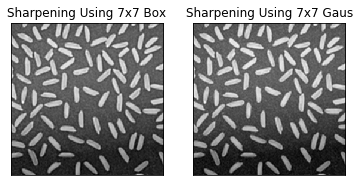

In [21]:
# Sharpen the rice.png:

img_path = "./rice.png"
img = cv2.imread(img_path)

# Convert image to grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
height, width = img_gray.shape

# Created Blurred image using 7x7 Box, and make new copy
img_blur_box = cv2.blur(img_gray, (7,7))

# Create Blurred image using 7x7 Gaussian
img_blur_gaus = cv2.GaussianBlur(img_gray, (7,7), 0)

#1. Details (D) = original (I) - blurred (B)
# Iterate over row, col and replace each pixel
for row in range(0, height):
    for col in range(0, width):
        img_blur_box[row][col] = int(img_gray[row][col]) - int(img_blur_box[row][col])
        img_blur_gaus[row][col] = int(img_gray[row][col]) - int(img_blur_gaus[row][col])        

#2. Sharpened(S) = original (I) + details(D)
# Iterate over row, col and replace each pixel
for row in range(0, height):
    for col in range(0, width):
        img_blur_box[row][col] = int(img_gray[row][col]) + int(img_blur_box[row][col])
        img_blur_gaus[row][col] = int(img_gray[row][col]) + int(img_blur_gaus[row][col])
        
plt.subplot(121), plt.imshow(img_blur_box, cmap='gray')
plt.title("Sharpening Using 7x7 Box"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(img_blur_gaus, cmap='gray')
plt.title("Sharpening Using 7x7 Gaus"), plt.xticks([]), plt.yticks([])
plt.show()

### 2.2.2

# 3 - Edge Detection 

## 3.1 - Sobel edge detection

In [ ]:
kernel = np.ones((5, 5), np.float32)/(5*5)
cv2.Sobel